In [259]:
import pandas as pd
df=pd.read_csv('C:/Users/abhi0/Downloads/Worldwide-Earthquake-database.csv')

In [260]:
df.head()

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
0,1,No,-2150,NaN,NaN,NaN,NaN,,NaN,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Yes,-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,No,-2000,NaN,NaN,NaN,NaN,NaN,18.0,7.1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
3,5877,Yes,-1610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,8,No,-1566,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
print(df.isna().sum())
print(len(df))

I_D                                      0
FLAG_TSUNAMI                             0
YEAR                                     0
MONTH                                  407
DAY                                    561
HOUR                                  2042
MINUTE                                2247
SECOND                                1846
FOCAL_DEPTH                           2965
EQ_PRIMARY                            1791
EQ_MAG_MW                             4872
EQ_MAG_MS                             3265
EQ_MAG_MB                             4391
EQ_MAG_ML                             6009
EQ_MAG_MFA                            6179
EQ_MAG_UNK                            5416
INTENSITY                             3378
COUNTRY                                  0
STATE                                 5872
LOCATION_NAME                            1
LATITUDE                                49
LONGITUDE                               49
REGION_CODE                              1
DEATHS     

In [262]:
temp=list(df['YEAR'].groupby(df['FLAG_TSUNAMI']))

#Didn't have Tsunami
print(temp[0][1:])

#had Tsunami:
print(temp[1][1:])


(0      -2150
2      -2000
4      -1566
5      -1450
7      -1250
        ... 
6185    2020
6186    2020
6188    2020
6190    2020
6191    2020
Name: YEAR, Length: 4360, dtype: int64,)
(1      -2000
3      -1610
6      -1365
10      -590
12      -525
        ... 
6179    2020
6182    2020
6187    2020
6189    2020
6192    2020
Name: YEAR, Length: 1833, dtype: int64,)


In [287]:
monthDict={1.0:'Jan',2.0:'Feb',3.0:'March',4.0:'April',5.0:'May',6.0:'Jun',7.0:'Jul',8.0:'Aug',9.0:'Sep',10.0:'Oct',
           11.0:'Nov',12.0:'Dec'}

tempPrime=''
tempTildaPrime=''

df.dropna(subset=['DAY'],inplace=True)
df.dropna(subset=['MONTH'],inplace=True)

def tsunamiCheck(temp,tempTilda,tempTildaPrime,tempAlpha):
    
    if tempTilda=='Yes':
        tempPrime=monthDict[temp]
        if tempTildaPrime<0:
            tempTildaPrime=str(tempTildaPrime)
            idx=tempTildaPrime.index('-')
            tempTildaPrime=tempTildaPrime[idx+1:]+'BC'
            
        return tempPrime,tempTildaPrime,int(tempAlpha)
    else:
        return ('','')

temp1=list(map(tsunamiCheck,list(df['MONTH']),list(df['FLAG_TSUNAMI']),list(df['YEAR']),list(df['DAY'])))

In [272]:
tempMonthTsunami=[]
tempYearTsunami=[]
tempDayTsunami=[]

for i in temp1:
    if i[0]!='' and i[1]!='':
        tempMonthTsunami.append(i[0])
        tempYearTsunami.append(i[1])
        tempDayTsunami.append(i[2])
        tempCountryTsunami.append(i[3])

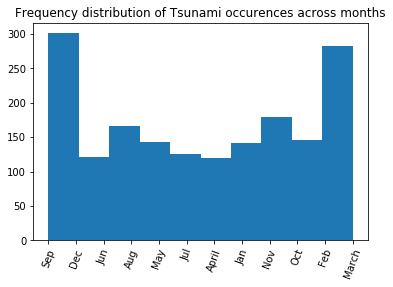

In [258]:
import matplotlib.pyplot as plt
plt.hist(tempMonthTsunami)
plt.tick_params(axis='x',rotation=70)
plt.title('Frequency distribution of Tsunami occurences across months')
plt.show()


Month of 'December' and 'March' seemed to have a peak in the frequency of Tsunami occurences. 

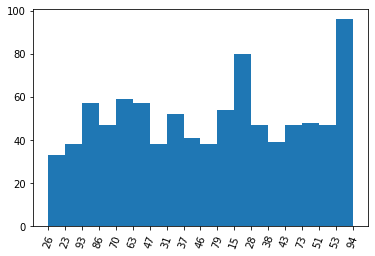

In [281]:
tempNum=[]
for i in tempYear:
    i=str(i)
    tempNum.append(i[len(i)-2:len(i)])


plt.hist(tempNum,bins=range(1,20))
plt.tick_params(axis='x',rotation=70)
plt.show()

The distribution of Tsunami occurences across the last two digit of 'Years'. 

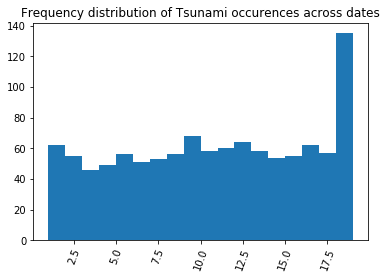

In [280]:
import matplotlib.pyplot as plt
plt.hist(tempDayTsunami,bins=range(1,20))
plt.tick_params(axis='x',rotation=70)
plt.title('Frequency distribution of Tsunami occurences across dates')
plt.show()

The distribution of Tsunami occurence across different 'dates' seems irrelevant, which is expected. 

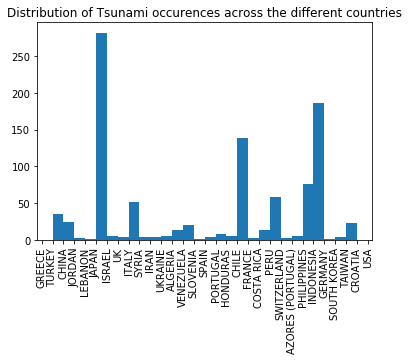

In [289]:
tempLst=df[df['FLAG_TSUNAMI']=='Yes']['COUNTRY']

import matplotlib.pyplot as plt
plt.hist(tempLst,bins=range(1,30))
plt.tick_params(axis='x',rotation=90)
plt.title('Distribution of Tsunami occurences across the different countries')
plt.show()

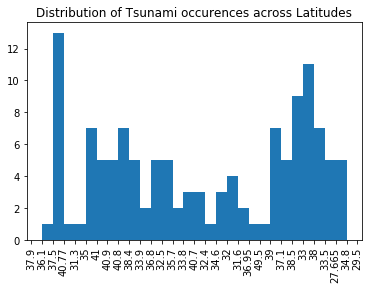

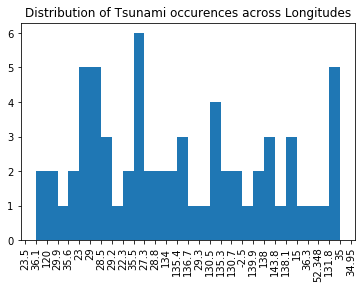

In [319]:
#latitude and longitude: 

df.dropna(subset=['LATITUDE'],inplace=True)
tempLst_1=df[df['FLAG_TSUNAMI']=='Yes']['LATITUDE']

plt.hist(tempLst_1,bins=range(1,30))
plt.tick_params(axis='x',rotation=90)
plt.title('Distribution of Tsunami occurences across Latitudes')
plt.show()

df.dropna(subset=['LONGITUDE'],inplace=True)
tempLst_2=df[df['FLAG_TSUNAMI']=='Yes']['LONGITUDE']

plt.hist(tempLst_2,bins=range(1,30))
plt.tick_params(axis='x',rotation=90)
plt.title('Distribution of Tsunami occurences across Longitudes')
plt.show()

In [318]:
#In plotly
#Most frequent location with Tsunami
#Tsunami zone:

import plotly.graph_objects as go

fig = go.Figure(go.Scattermapbox(
    fill = "toself",
    lon = tempLst_1, lat =tempLst_2,
    marker = { 'size': 10, 'color': "orange" }))

fig.update_layout(
    mapbox = {
        'style': "stamen-terrain",
        'center': {'lon': 99, 'lat': 10 },
        'zoom': 5},
    showlegend = False)

fig.show()